In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import math 

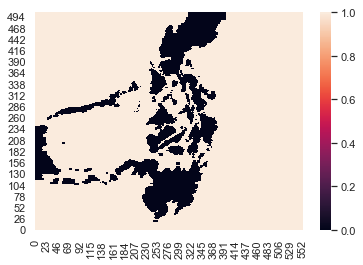

In [166]:
mask = np.loadtxt("OceanFlow/mask.csv", delimiter=',')
mask = np.flip(mask,0)
ax = sns.heatmap(mask)
ax.invert_yaxis()
plt.show()
#invert the y-axis label; not the yaxis

In [240]:
print mask.shape
num_row,num_col = mask.shape

(504, 555)


In [20]:
U = np.zeros((num_row, num_col, 100))
V = np.zeros((num_row, num_col, 100))
SPEED = np.zeros((num_row, num_col, 100))
for i in range(100):
    filename_u = "OceanFlow/" + str(i+1) + "u.csv"
    U[:,:,i] = np.loadtxt(filename_u, delimiter=',')
    filename_v = "OceanFlow/" + str(i+1) + "v.csv"
    V[:,:,i] = np.loadtxt(filename_v, delimiter=',')
    SPEED[:,:,i] = np.sqrt( U[:,:,i]**2 + V[:,:,i]**2 )

### 1-grid:3km;  interval is 3 hours;  *25/0.9 to get cm/second

### (a) 
We assume that a particle in the ocean, with certain coordinates, will inherit the velocity correponding to the flow at those coordinates. Implement a procedure to track its position and movement caused by the time-varying flow. Explain the procedure, and show that it works by providing examples and plots.

In [168]:
M, L = mask.shape
#initialize particle's location (X,Y)
#location = (y,x)

def get_random_location():
    '''
    make sure location is in the sea
    '''
    location = (np.random.uniform(0,M), np.random.uniform(0,L) )
    y = int(math.floor(location[0]))
    x = int(math.floor(location[1]))
    while mask[y,x] == 0:
        location = ( np.random.uniform(0,M), np.random.uniform(0,L) )
        y = int(math.floor(location[0]))
        x = int(math.floor(location[1]))
    return location
        
def get_velocity(loc,t):
    '''
    given location and time t, return the u and v as a tuple for this paricle.
    unit is m/second
    '''
    y = int(math.floor(loc[0]))
    x = int(math.floor(loc[1]))
    u = U[y,x,t]*25/0.9/100
    v = V[y,x,t]*25/0.9/100
    return (u,v)

def move(loc, stepsize_t, t):
    '''
    the unit of stepsize_t is second.
    an hour = 3600 seconds.
    '''
    y = loc[0]
    x = loc[1]
    u,v = get_velocity(loc,t) # unit = m/s
    return (y+v*stepsize_t/3000, x+u*stepsize_t/3000)


In [220]:
def plot_trajectory(init_loc, end_loc, stepsize_t, maxtimes):
    '''
    max times unit is an hour
    '''
    ax = sns.heatmap(mask)
    ax.invert_yaxis()
    y,x = init_loc
    times= 0
    x_list = []
    y_list = []
    while times<maxtimes:
        interval_times = int(math.floor(times/3))
        y, x = move((y,x), stepsize_t, interval_times); #freeze time now
        x_list.append(x)
        y_list.append(y)
        times+=stepsize_t/3600
    scatter = plt.plot(x_list, y_list, marker='o', markersize=0.1, color="red")
    plt.plot(x_list[0],y_list[0],marker='o', markersize = 5, color = 'green')

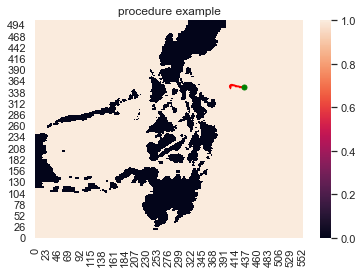

<Figure size 432x288 with 0 Axes>

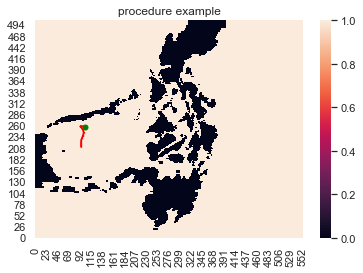

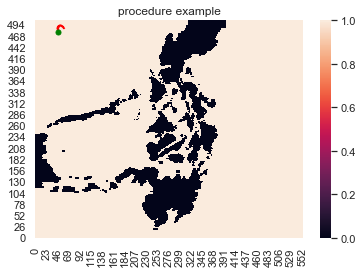

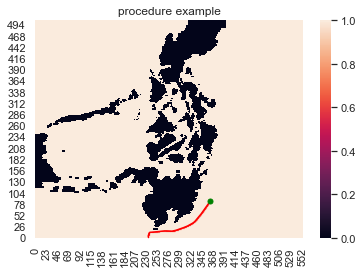

In [213]:
plt.figure(1)
plot_trajectory(get_random_location(),(200,200),3600,300)
plt.savefig('exampe1')
plt.show()
plt.figure(2)
plot_trajectory(get_random_location(),(200,200),3600,300)

plt.figure(3)
plot_trajectory(get_random_location(),(200,200),3600,300)
plt.figure(4)
plot_trajectory(get_random_location(),(200,200),3600,300)

### (b) 
A (toy) plane has crashed in the Sulu Sea at T = 0. The exact location is unknown, but data suggests that the location of the crash follows a Gaussian distribution with mean (100, 350) (namely (300km,1050km)) with variance σ2. The debris from the plane have been carried away by the ocean flow. You are about to lead a search expedition for the debris. Where would you expect the parts to be at 48hrs, 72hrs, 120hrs? Study the problem varying the variance of the Gaussian distribution. Either pick a few variance samples or sweep through the variances if desired. (Hint: Sample particles and track their evolution.)

In [217]:
def get_normal_random(sigma_square):
    '''
    return a random location based on normal distruibution, (y,x)
    '''
    sigma = math.sqrt(sigma_square)
    y = np.random.normal(M-350, sigma)
    x = np.random.normal(100,sigma)
    return (y,x)

In [218]:
get_normal_random(50)

(151.15372798201875, 96.326219823437)

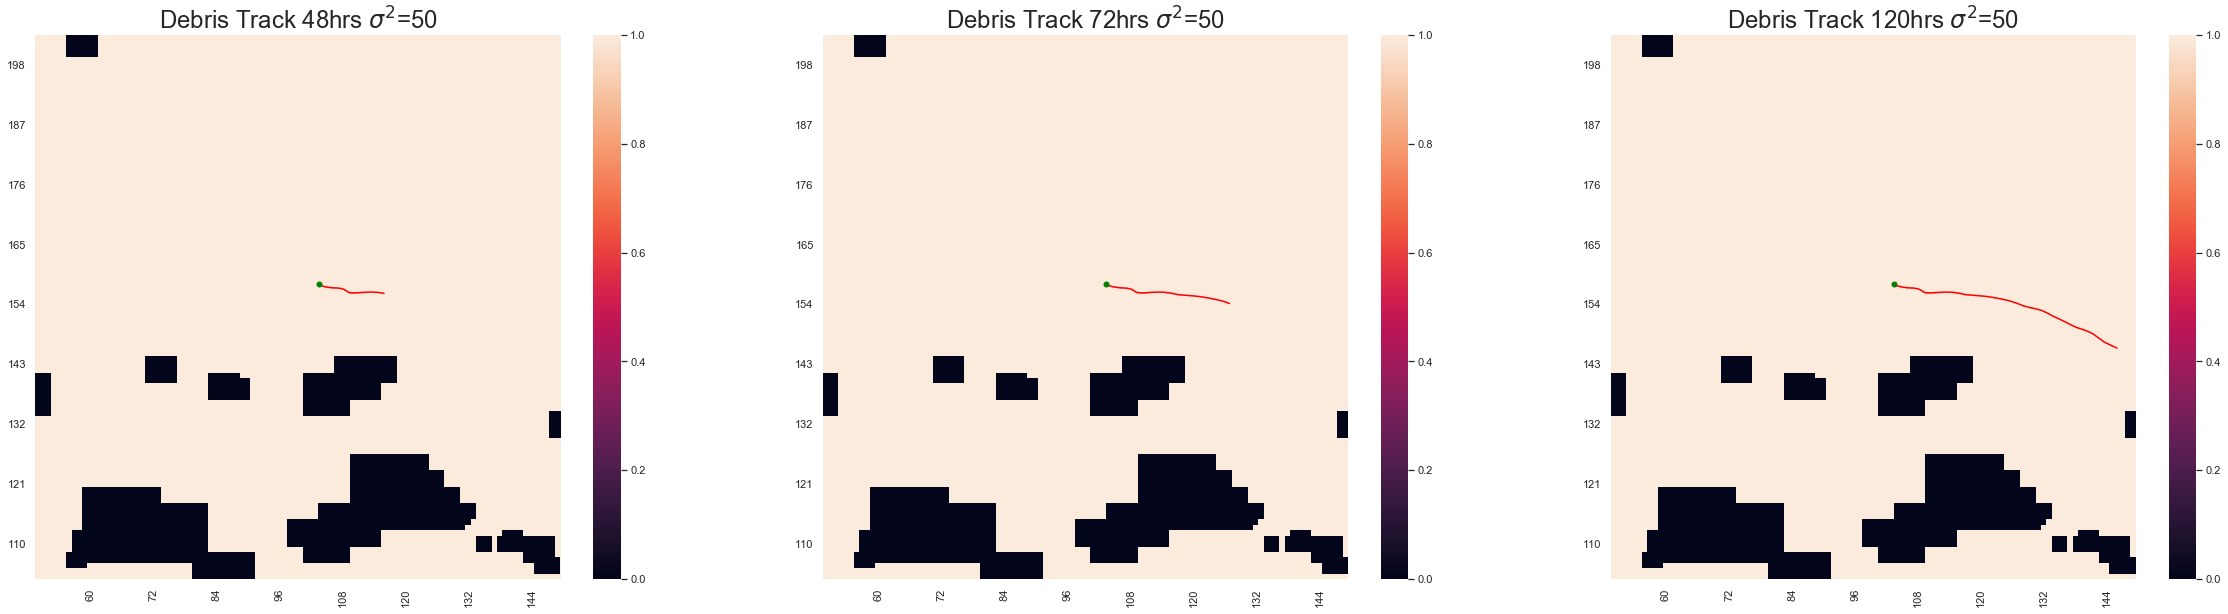

In [235]:
crush_location = get_normal_random(100)
plt.figure(figsize=(40,10))
plt.subplot(1,3,1)
plot_trajectory(crush_location,(200,200),3600,48)
plt.axis((50,150,M-350-50,M-350+50))
plt.title('Debris Track 48hrs $\sigma^2$=50',size = 24)

plt.subplot(1,3,2)
plot_trajectory(crush_location,(200,200),3600,72)
plt.axis((50,150,M-350-50,M-350+50))
plt.title('Debris Track 72hrs $\sigma^2$=50',size = 24)

plt.subplot(1,3,3)
plot_trajectory(crush_location,(200,200),3600,120)
plt.axis((50,150,M-350-50,M-350+50))
plt.title('Debris Track 120hrs $\sigma^2$=50', size= 24)
plt.show()

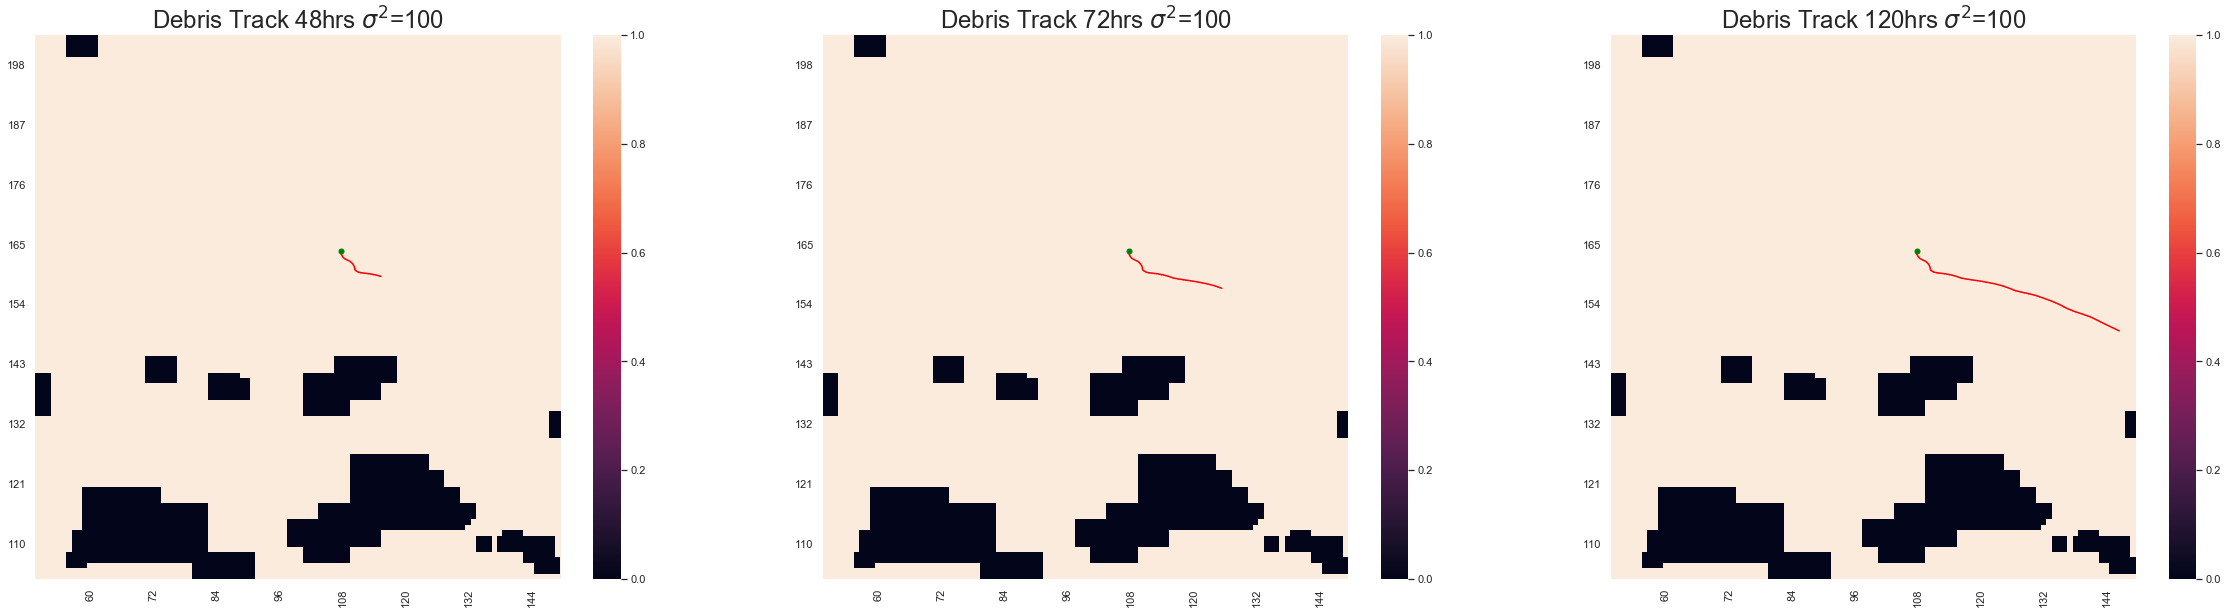

In [238]:
crush_location = get_normal_random(100)
plt.figure(figsize=(40,10))
plt.subplot(1,3,1)
plot_trajectory(crush_location,(200,200),3600,48)
plt.axis((50,150,M-350-50,M-350+50))
plt.title('Debris Track 48hrs $\sigma^2$=100',size = 24)

plt.subplot(1,3,2)
plot_trajectory(crush_location,(200,200),3600,72)
plt.axis((50,150,M-350-50,M-350+50))
plt.title('Debris Track 72hrs $\sigma^2$=100',size = 24)

plt.subplot(1,3,3)
plot_trajectory(crush_location,(200,200),3600,120)
plt.axis((50,150,M-350-50,M-350+50))
plt.title('Debris Track 120hrs $\sigma^2$=100', size= 24)
plt.show()